In [1]:
# https://mjdeeplearning.tistory.com/2

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib as mpl
import matplotlib.pylab as plt
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
import scipy.stats as stats
import sklearn
import statsmodels.api as sm

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [3]:
from sklearn.datasets import load_boston

boston = load_boston()

dfX = pd.DataFrame(boston.data, columns=boston.feature_names)

dfy = pd.DataFrame(boston.target, columns=["MEDV"])

df_house = pd.concat([dfX, dfy], axis=1)

df_house.tail(10)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
496,0.28960,0.0,9.69,0.0,0.585,5.390,72.9,2.7986,6.0,391.0,19.2,396.90,21.14,19.7
497,0.26838,0.0,9.69,0.0,0.585,5.794,70.6,2.8927,6.0,391.0,19.2,396.90,14.10,18.3
498,0.23912,0.0,9.69,0.0,0.585,6.019,65.3,2.4091,6.0,391.0,19.2,396.90,12.92,21.2
499,0.17783,0.0,9.69,0.0,0.585,5.569,73.5,2.3999,6.0,391.0,19.2,395.77,15.10,17.5
500,0.22438,0.0,9.69,0.0,0.585,6.027,79.7,2.4982,6.0,391.0,19.2,396.90,14.33,16.8
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48,22.0
505,0.04741,0.0,11.93,0.0,0.573,6.030,80.8,2.5050,1.0,273.0,21.0,396.90,7.88,11.9


In [4]:
df_house.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


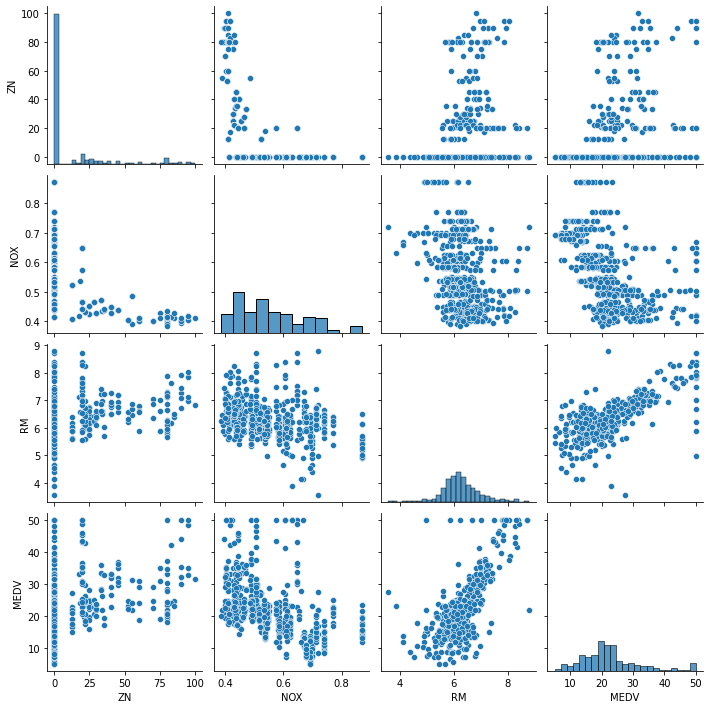

In [5]:
columns = ["ZN", "NOX", "RM", "MEDV"]

sns.pairplot(df_house[columns])

plt.show()

In [6]:
# X ,Y 데이터 나누기.

x_data = df_house.iloc[:,0:-1]

y_data = df_house.iloc[:,-1]

x_data.tail(5)



#Train , Test 데이터 분할하기.



#방법 1

# ratio = 0.7

# num_data = int(len(df_house)* ratio)

# train_X, test_X = x_data[:num_data], x_data[num_data:] #slicing

# train_y, test_y = y_data[:num_data], y_data[num_data:]



#방법 2 ( Train data = 67%,  Test data = 33% )

train_x, test_x, train_y, test_y = sklearn.model_selection.train_test_split(x_data, y_data, test_size = 0.33)



# LinearRegression 모델 생성

m_reg = LinearRegression(fit_intercept = True) #fit_intercept -> beta0 생성 여부

# 모델 학습

m_reg.fit(train_x, train_y) 



# 테스트 데이터를 이용해 예측하기.

y_pred = m_reg.predict(test_x)

print(m_reg.score(test_x, test_y))

0.7282816273099963


In [10]:
m_reg = sm.OLS(train_y, train_x).fit()

# Print out the statistics

print(m_reg.summary())

                                 OLS Regression Results                                
Dep. Variable:                   MEDV   R-squared (uncentered):                   0.959
Model:                            OLS   Adj. R-squared (uncentered):              0.957
Method:                 Least Squares   F-statistic:                              587.2
Date:                Wed, 29 Sep 2021   Prob (F-statistic):                   2.93e-217
Time:                        05:46:15   Log-Likelihood:                         -1026.6
No. Observations:                 339   AIC:                                      2079.
Df Residuals:                     326   BIC:                                      2129.
Df Model:                          13                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

In [8]:
Y_pred = m_reg.predict(test_x)

mse = sklearn.metrics.mean_squared_error(test_y, Y_pred)

print(mse)

23.558685250695067


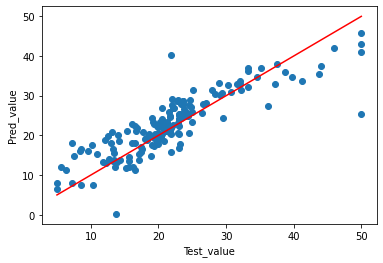

In [11]:
plt.scatter(test_y, y_pred)

line = np.linspace(min(test_y), max(test_y), 1000)

plt.plot(line, line, color = 'r')

plt.xlabel('Test_value')

plt.ylabel('Pred_value')

plt.show()

In [15]:
print(sm.OLS(test_y, test_x).fit().summary())

                                 OLS Regression Results                                
Dep. Variable:                   MEDV   R-squared (uncentered):                   0.963
Model:                            OLS   Adj. R-squared (uncentered):              0.960
Method:                 Least Squares   F-statistic:                              312.3
Date:                Wed, 29 Sep 2021   Prob (F-statistic):                   1.83e-103
Time:                        05:52:31   Log-Likelihood:                         -488.27
No. Observations:                 167   AIC:                                      1003.
Df Residuals:                     154   BIC:                                      1043.
Df Model:                          13                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

In [16]:
print(sm.OLS(Y_pred, test_x).fit().summary())

                                 OLS Regression Results                                
Dep. Variable:                      y   R-squared (uncentered):                   1.000
Model:                            OLS   Adj. R-squared (uncentered):              1.000
Method:                 Least Squares   F-statistic:                          3.037e+30
Date:                Wed, 29 Sep 2021   Prob (F-statistic):                        0.00
Time:                        05:53:02   Log-Likelihood:                          4887.3
No. Observations:                 167   AIC:                                     -9749.
Df Residuals:                     154   BIC:                                     -9708.
Df Model:                          13                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------